<a href="https://colab.research.google.com/github/ce3tnia/MachineLearning/blob/master/MachineLearning5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Preprocessing** **Data**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import data
df = pd.read_csv('/content/drive/My Drive/MachineLearning/Iris.csv')
#tampilan 5 data terakhir
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
#hapus atribut yang tidak digunakan
df.drop(['Id'], axis=1, inplace=True)

#tampilkan 5 data pertama
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
import sklearn
from sklearn.model_selection import train_test_split

#bagi menjadi atribut dan label
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

len(x_test), len(x_train)

(30, 120)

In [5]:
y_train

147     Iris-virginica
13         Iris-setosa
127     Iris-virginica
91     Iris-versicolor
35         Iris-setosa
            ...       
64     Iris-versicolor
107     Iris-virginica
34         Iris-setosa
121     Iris-virginica
138     Iris-virginica
Name: Species, Length: 120, dtype: object

# **SVM**

In [6]:
from sklearn import svm

#buat model
model_svm = svm.SVC()
#training model
model_svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
#prediksi model
pred_svm = model_svm.predict(x_test)
#evaluasi dengan data text
accuracy = (pred_svm == y_test).sum()/len(y_test)
accuracy

0.9666666666666667

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred_svm, y_test)
cm

array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  1, 10]])

# **ANN**

# **SKLearn**

In [9]:
from sklearn.neural_network import MLPClassifier
#buat model
model_mlp = MLPClassifier(hidden_layer_sizes=(8, 16, 32, 64, 32, 8, 4))
#training model
model_mlp.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 16, 32, 64, 32, 8, 4),
              learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=None,
              shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)

In [10]:
#predict model
pred_mlp = model_mlp.predict(x_test)

#evaluate using data test
accuracy = (pred_mlp == y_test).sum()/len(y_test)
accuracy

0.9666666666666667

# **Keras Tensorflow**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import data
df = pd.read_csv('/content/drive/My Drive/MachineLearning/Iris.csv')
#tampilan 5 data terakhir
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [12]:
#hapus atribut yang tidak digunakan
df.drop(['Id'], axis=1, inplace=True)

#tampilkan 5 data pertama
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#bagi menjadi atribut dan label
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)

y = pd.get_dummies(y1).values

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split (x_train, y_train, test_size=0.2)

len(x_test), len(x_train), len(x_val)

(30, 96, 24)

In [14]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 21        
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train, epochs=200, validation_data=(x_val, y_val))

Epoch 1/200
3/3 [==============================] - 0s 67ms/step - loss: 1.1558 - accuracy: 0.2917 - val_loss: 1.0675 - val_accuracy: 0.2500
Epoch 2/200
3/3 [==============================] - 0s 7ms/step - loss: 1.1365 - accuracy: 0.3854 - val_loss: 1.0708 - val_accuracy: 0.2917
Epoch 3/200
3/3 [==============================] - 0s 8ms/step - loss: 1.1222 - accuracy: 0.3958 - val_loss: 1.0784 - val_accuracy: 0.3333
Epoch 4/200
3/3 [==============================] - 0s 6ms/step - loss: 1.1086 - accuracy: 0.4062 - val_loss: 1.0841 - val_accuracy: 0.2500
Epoch 5/200
3/3 [==============================] - 0s 7ms/step - loss: 1.0967 - accuracy: 0.3854 - val_loss: 1.0849 - val_accuracy: 0.2500
Epoch 6/200
3/3 [==============================] - 0s 7ms/step - loss: 1.0857 - accuracy: 0.3854 - val_loss: 1.0848 - val_accuracy: 0.2500
Epoch 7/200
3/3 [==============================] - 0s 7ms/step - loss: 1.0756 - accuracy: 0.3854 - val_loss: 1.0782 - val_accuracy: 0.2500
Epoch 8/200
3/3 [=========

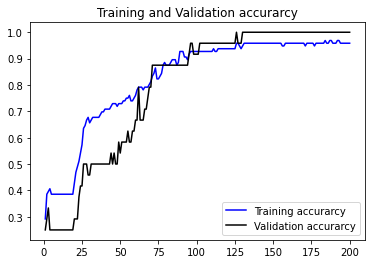

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.figure()
plt.plot(epochs, acc, 'blue', label='Training accurarcy')
plt.plot(epochs, val_acc, 'black', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

#Show Plot
plt.show()

In [19]:
import numpy as np
y_pred = model.predict(x_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

accuracy = (y_pred_class == y_test_class).sum()/len(y_test_class)
accuracy

1.0

In [20]:
y_pred

array([[8.6668122e-04, 1.1420789e-01, 8.8492543e-01],
       [3.9900634e-02, 9.2607409e-01, 3.4025192e-02],
       [8.7388635e-02, 8.7416977e-01, 3.8441576e-02],
       [3.9129842e-05, 2.4454234e-02, 9.7550666e-01],
       [9.7311413e-01, 2.6795318e-02, 9.0495108e-05],
       [1.9493673e-02, 8.3265364e-01, 1.4785275e-01],
       [9.7559410e-01, 2.4338026e-02, 6.7748937e-05],
       [9.7176719e-01, 2.8126786e-02, 1.0606061e-04],
       [3.2399911e-02, 9.1636795e-01, 5.1232144e-02],
       [9.7427553e-01, 2.5644731e-02, 7.9653146e-05],
       [9.7692752e-01, 2.3015566e-02, 5.6999757e-05],
       [9.7102058e-01, 2.8864503e-02, 1.1493276e-04],
       [1.1297762e-05, 9.3984529e-03, 9.9059021e-01],
       [9.5975643e-01, 3.9927676e-02, 3.1585677e-04],
       [2.9237475e-03, 5.0854647e-01, 4.8852983e-01],
       [9.6549028e-01, 3.4312900e-02, 1.9677525e-04],
       [7.4732096e-05, 1.8103546e-02, 9.8182172e-01],
       [9.4851512e-01, 5.1225994e-02, 2.5898052e-04],
       [9.6381265e-01, 3.602

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_class, y_test_class)
cm

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  7]])